# Outline
Goal: Predict 'Adj Close' as target with features as follows: 'Open', 'High', 'Low', 'Close'

# Import libraries and data

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.offline import plot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# Unzip archive
!unzip -o archive.zip

Archive:  archive.zip
  inflating: Top EV Company/Audi/audi.csv  
  inflating: Top EV Company/BMW/bmw.csv  
  inflating: Top EV Company/Honda/honda.csv  
  inflating: Top EV Company/Lucid Motors/lucid motors.csv  
  inflating: Top EV Company/NIO/NIO.csv  
  inflating: Top EV Company/Nissan/nissian.csv  
  inflating: Top EV Company/Rolls Royces/rolls royces.csv  
  inflating: Top EV Company/Tata/tata.csv  
  inflating: Top EV Company/Tesla/tesla.csv  
  inflating: Top EV Company/Volkswagen/Volkswagen.csv  


In [3]:
# Fetch data
audi = pd.read_csv('./Top EV Company/Audi/audi.csv')
bmw = pd.read_csv('./Top EV Company/BMW/bmw.csv')

## Warning!
- There're lots of manufacturers of electric cars but I'm gonna test for 'audi'
- Change the name of manufacutres would be okay!

In [4]:
# Sorting DataFrame
audi.sort_values(by='Date', ascending=False, inplace=True)
audi.reset_index(drop=True, inplace=True)
audi.drop('Volume', axis=1, inplace=True)
audi

,Date,Open,High,Low,Close,Adj Close
0,2021-08-20,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000
1,2021-08-19,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000
2,2021-08-18,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000
3,2021-08-17,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000
4,2021-08-16,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000
...,...,...,...,...,...,...
1252,2016-08-30,698.049988,710.000000,695.700012,695.700012,693.551025
1253,2016-08-29,701.549988,701.549988,701.549988,701.549988,699.382935
1254,2016-08-26,701.549988,701.549988,701.549988,701.549988,699.382935
1255,2016-08-25,701.549988,701.549988,701.549988,701.549988,699.382935


# Create Datasets

In [5]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [8]:
train_feature = audi[['Open', 'High', 'Low', 'Close']]
train_label = audi['Adj Close']

In [9]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 10)

In [12]:
X = train_feature
y = train_label

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=11)

# Modeling

In [14]:
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(1))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-08-24 23:25:32.660872: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-24 23:25:32.661503: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 16)                336       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [17]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val))

2021-08-24 23:25:39.480005: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-24 23:25:39.480688: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
 1/13 [=>............................] - ETA: 5s - loss: 751806.1875 - mse: 751806.1875

2021-08-24 23:25:39.783092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 63ms/step - loss: 672556.9375 - mse: 672556.9375 - val_loss: 438745.6250 - val_mse: 438745.6250
Epoch 2/100
 1/13 [=>............................] - ETA: 0s - loss: 467165.0000 - mse: 467165.0000

2021-08-24 23:25:40.622629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 47ms/step - loss: 310254.3438 - mse: 310254.3438 - val_loss: 132968.7031 - val_mse: 132968.7031
Epoch 3/100
13/13 [==============================] - 1s 45ms/step - loss: 65195.7617 - mse: 65195.7617 - val_loss: 2506.1763 - val_mse: 2506.1763
Epoch 4/100
13/13 [==============================] - 1s 45ms/step - loss: 6752.3149 - mse: 6752.3149 - val_loss: 7758.6128 - val_mse: 7758.6128
Epoch 5/100
13/13 [==============================] - 1s 45ms/step - loss: 4048.1265 - mse: 4048.1265 - val_loss: 788.4576 - val_mse: 788.4576
Epoch 6/100
13/13 [==============================] - 1s 45ms/step - loss: 1841.6766 - mse: 1841.6766 - val_loss: 1049.5487 - val_mse: 1049.5487
Epoch 7/100
13/13 [==============================] - 1s 45ms/step - loss: 1610.1322 - mse: 1610.1322 - val_loss: 648.5653 - val_mse: 648.5653
Epoch 8/100
13/13 [==============================] - 1s 44ms/step - loss: 1386.1912 - mse: 1386.1912 - val_loss: 568.9499 - val_mse: 568.9499


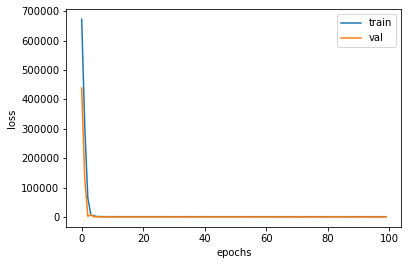

In [18]:
# Plot epochs - loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
# Evaluate model
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(2)}")
print(f"Test RMSE: {test_rmse.round(2)}")

2021-08-24 23:27:01.643819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Train RMSE: 35.7
Test RMSE: 9.78


In [22]:
# Prediction Plot
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test.ravel(),
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=test_pred.ravel(),
                    line=dict(dash='dash', width=3),
                    name='pred'))

fig.update_layout(
    title="Adj Close Prediction of Audi",
    height=500)
fig.show()